# Лабораторная работа №3 <a id='intro'></a>

- [Предварительная обработка](#31)
- [Кластеризация объектов](#32)
    - [Иерархический агломеративный метод](#321)
    - [Метод К-средних](#322)
- [Описание полученных кластеров](#33)
- [Выводы](#34)

# Предварительная обработка данных <a id='31'></a>

Проведём осмотр данных на предмет ошибок.

В начале выполнения данной лабораторной работы необходимо перед основными действиями обработать данные от *пропусков*, *явных* и *неявных* *дубликатов* и *привести столбцы* к правильным типам данных. Для проведения каждого из данных действий в библиотеке **Pandas** существуют отдельные функции.

Для начала, необходимо импортировать библиотеку **Pandas** в Python и загрузить в датафрейм из CSV-файла:

In [2]:
import pandas as pd

read_csv = pd.read_csv('4heart2.csv', sep=',')
data = pd.DataFrame(read_csv)

Также, при помощи импорта библиотеки "`warnings`" уберём все предупреждения, которые точно появятся при дальнейшей работе.

In [3]:
import warnings

warnings.filterwarnings('ignore')

Далее, выведем первые **20** строк в получившейся таблице, чтобы оценить качество данных на предмет необходимости *обработки от пропусков*:

In [4]:
data.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Исходя из первых 20 строк данного датасета, можно сделать вывод о том, что необходимо изменить тип данных одного столбца, а именно - "`age`". Также, необходимо изменить название столбца "`DEATH_EVENT`" и привести к виду, в котором все символы имеют нижний регистр, а пробелы между словами заполняются символом нижнего подчеркивания.

Изменение *типа данных* столбца происходит при помощи функции "`.astype()`", которая вызывается для столбца. В качестве параметров в данный метод передаётся тип данных, на который необходимо изменить столбец.      
Изменение *названия* столбца происходит при помощи метода "`.rename()`", которая используется для всего датафрейма. И в качестве параметров передаются названия столбцов, которые необходимо изменить.      

Проверка изменения проводиться при помощи метода "`.info()`":

In [5]:
data['age'] = data['age'].astype(int)
data = data.rename(columns={'DEATH_EVENT': 'death_event'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int32  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(2), int32(1), int64(10)
memory usage: 29.3 KB


Далее, проверим исходный датасет на наличие **пропусков**, или же *пустых значений*. Данное действие производиться при помощи специального метода `.isna()`, который ищет все пропуски в таблице. А вместе с ним используют метод `.sum()`, который просуммирует и выведет количество пустых значений в таблице.

In [6]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

Из вышеприведённого окна видно, что в исходном датасете проверка на пропуски показала их *полное отсутствие*, что очень хорошо.

Далее, следующим этапом при предварительной обработке данных является **поиск дубликатов**.

Поиск дубликатов обычно делиться на 2 типа: *поиск явных дубликатов* и *поиск неявных дубликатов*. Начнем с первого случая.

Для поиска явных дубликатов используется функция "`.duplicated()`", которая просто ищет дубликаты. По умолчанию данный метод признает дубликатами те строки, которые полностью повторяют уже встречавшиеся в датасете. 
Т.е. метод, как и в случае с методом "`.isna()`", выводит значения либо **True**, либо **False**. Поэтому для понимания количества дубликатов добавляют, как и в предыдущем случая, функцию "`.sum()`".

In [7]:
data.duplicated().sum()

0

Получается, что **полностью повторяющихся строк в данном датасете нету**, что хорошо.

Теперь займемся поиском неявных дубликатов. Для этого используют метод "`.unique()`" для каждого столбца датасета. И чтобы вручную не писать этот метод для каждого столбца, гораздо проще будет создать цикл, который будет проходить по массиву, созданному по всем названиям столбцов.

In [8]:
col = data.columns
for column in col:
    print(data[column].unique())

[75 55 65 50 90 60 80 62 45 49 82 87 70 48 68 53 95 58 94 85 69 72 51 57
 42 41 67 79 59 44 63 86 66 43 46 61 81 52 64 40 73 77 78 54 47 56]
[0 1]
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334 2442  776
  196  835 3966  171  198   95 1419  478  176  395   99  145  104 1896
  151  244   62  121  418  167 1211 1767  308   97   64  101  212 2281
  972  131  135 1202  427 1021  118   86  675   57 2794   56  211  166
 

В ходе поиска неявных дубликатов обычно ищут:
- альтернативные варианты написания одного и того же значения;
- ошибочные написания.

И как видно из выводимого сообщения выше, в данном датасете **отсутствуют неявные дубликаты**.

И подводя итог, можно сделать вывод о том, что **в данном датасете нету никаких дубликатов**, ни явных, ни неявных.

Таким образом, подводя итог данной части лабораторной работы, можно сделать вывод о том, что *предварительная обработка данных прошла успешно*. Значит, можно приступать к остальным этапам лабораторной работы.

[Вернуться в начало](#intro)

# Кластеризация объектов <a id='32'></a>

**Кластеризация** - разделение объектов на группы, при этом "правильные" ответы, то есть заранее заданных классов - нету.

Кластеризацию обычно применяют:
- для сегментации клиентов;
- для сегментации продуктов;
- для тематического моделирования.

**Модель** - система взаимосвязей между признаками и целевой переменной или между наблюдениями, которая максимально близко отражает действительность.       
Модель обучают на основе уже имеющихся *наблюдений*. Строят такие модели разными методами, или *алгоритмами*.

В *Python* есть библиотека **sklearn**, которая помогает обучать модели.

### Дополнительное задание

В качестве дополнительного задания было предложено создать парную диаграмму для всего исходного датасета, в которой будет отображена зависимость столбца "`death_event`" от всех остальных столбцов. Данная диаграмма была посторена благодаря методу `.pairplot()`, который расположен в библиотеке **Seaborn**.

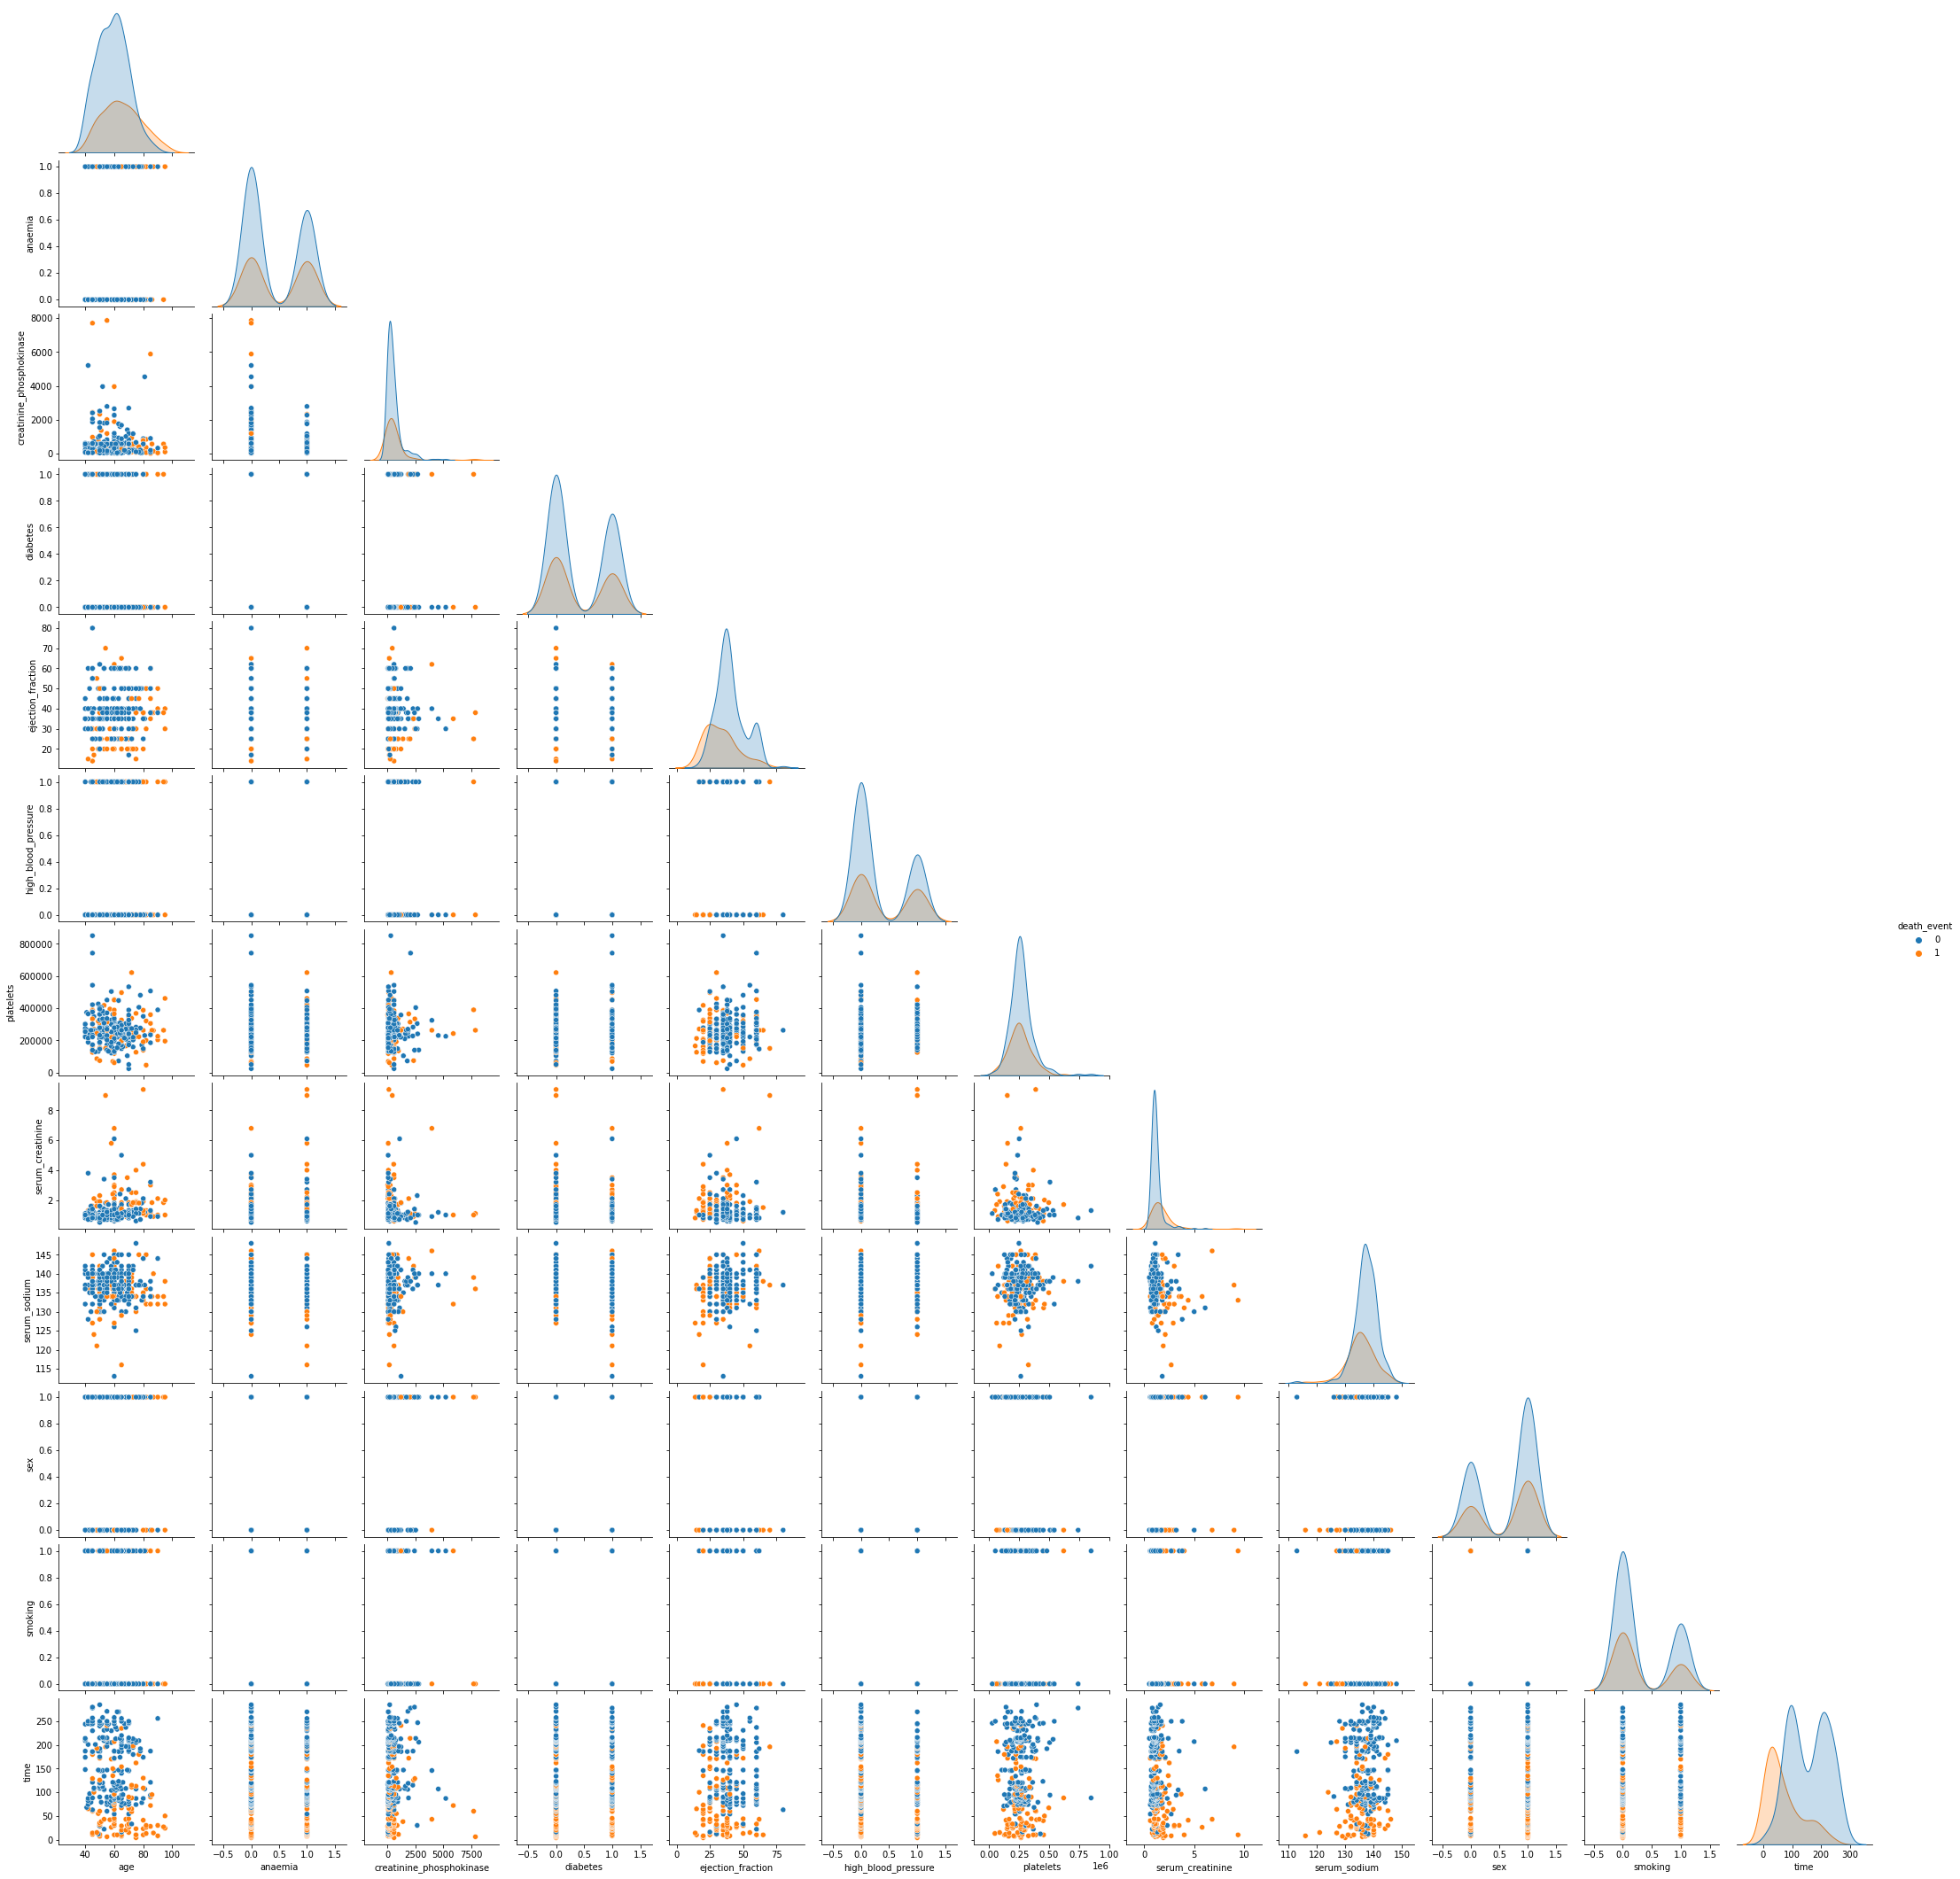

In [9]:
import seaborn as sns
sns.pairplot(data, hue = 'death_event', corner=True)

Синими точками на точечных диаграммах и синими площадями в остальных графиках указываются те пациенты, которые в результате прохождения обследования выжили, а оранжевыми - соответственно - погибли. 

Исходя из полученных графиков видно, что пациенты чаще выживали, чем умирали. Но если, например, посмотреть на график зависимости события смерти от пола, то можно сказать, что чаще и умирали, и выживали пациенты мужского пола. А если в качестве рассматриваемых столбцов взять любые небинарные, то получается следующая зависимость: *что не существует зависимости между значениями параметров и вероятностью смерти, если эти значения лежат в пределах нормы. Однако, если значения превышают норму, то в таких случаях шанс смерти возрастает многократно*. Данная зависимость не работает с столбцов времени, поскольку для этого столбца существует своя зависимость, а именно: *пациенты, которые погибают во время обследования, проводят времени значительно меньше чем те пациенты, которые выживают*.

## Иерархический агломеративный метод <a id='321'></a>

Суть иерархической кластеризации проста. Происходит вычисление матрицы расстояний между всеми объектами, в ячейках которой будет попарное расстояние между двумя объектами. А еще учтены все признаки объектов, а не только 2, как в методе к-средних. 

На основе этой матрицы можно последовательно объединять близкие кластеры. Однако расстояния между объектами и сама агломеративная иерархическая кластеризация хорошо визуализируется на специальных графиках - **дендрограммах**.

По вертикали на таких диаграммах указывается расстояние между кластерами, а по горизонтали - объекты. Каждая горизонтальная *связка* соответствует расстоянию между объединяемыми объектами. Если двигаться по этому графику снизу вверх, то: сначала идут связки, которые соединяют отдельные объекты; потом связки, которые соединяют объекты с группами или одни группы объектов с другими.

Данный способ кластеризации интуитивно понятный и наглядный. На каждом шаге алгоритм наращивает кластеры, присоединяя соседние. Потому он и называется *агломеративным*, ведь превращает кластеры в **агломерации** - так называют объединение соседствующих населённых пунктов.

По дендрограмме можно визуально оценить, сколько кластеров должно быть. А также примерно оценить расстояние, после которого объединение объектом перестает работать.

Перед началом выполнения кластеризации данным методом в **Python**, необходимо импортировать из модуля **hierarchy** классы модели кластеризации "`linkage()`" и "`dendrogram()`". А также, для стандартизации данных необходимо импортировать класс "`StandardScaler()`". Помимо всех прочих библиотек, для работы с дендрограммой требуется импортировать `matplotlib`.

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Затем, проведём стандартизацию данных и передадим получившуюся таблицу в качестве параметра функции "`linkage()`". Чтобы диаграмма получилась показательной, передадим параметру "`method`" значение '`ward`'. Данный параметр отвечает за использованный алгоритм связывания

In [11]:
sc = StandardScaler()
table_sc = sc.fit_transform(data)

linked = linkage(table_sc, method='ward')


В переменной `linked` храниться таблица *связей* между объектами. Её можно визуализировать как дендрограмму, показанную ниже:

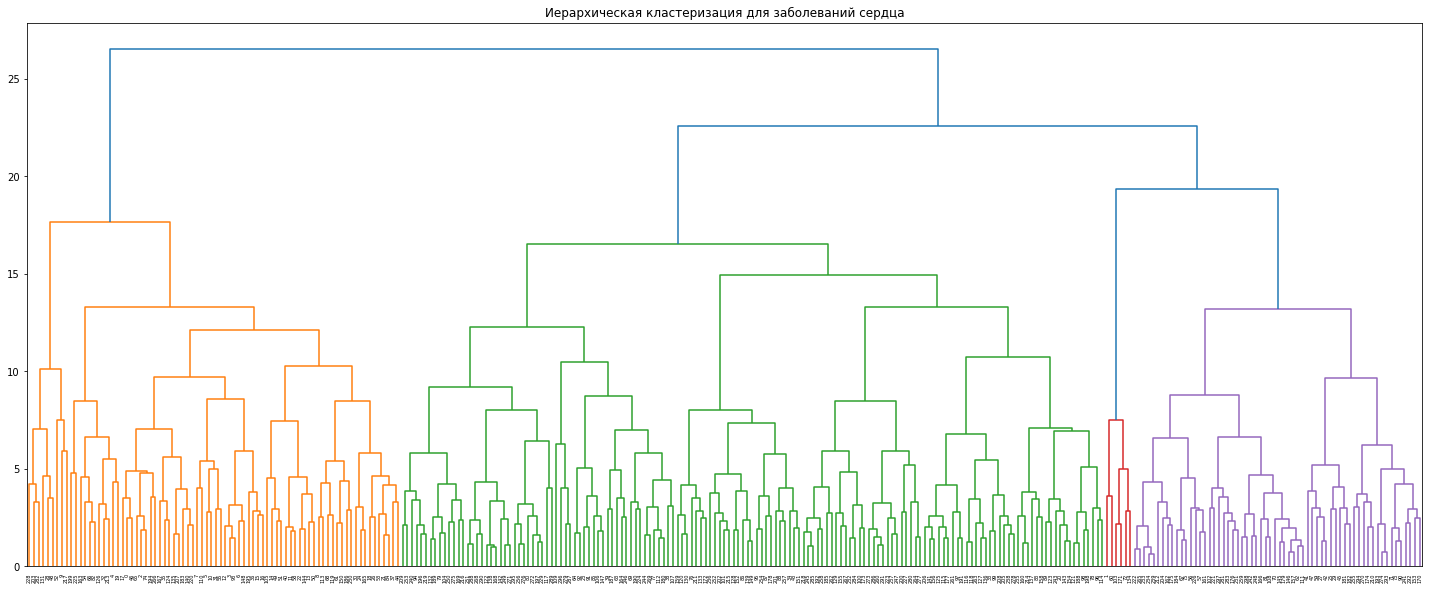

In [12]:
plt.figure(figsize=(25, 10))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация для заболеваний сердца')
plt.show() 

Далее, необходимо разобраться, какие кластеры за что отвечают. Для начала, посчитаем количество пациентов, которые умерли в ходе проведения лечения при помощи метода `value_count()`. Почему подсчет ведётся по этому столбцу? Ответ: потому что до кластеризации иерархическим методом из датасета не был убран ключевой столбец, а именно `death_event`. Поэтому, самое первое разделение данных проводилось именно по этому столбцу.

In [14]:
data['death_event'].value_counts()

0    203
1     96
Name: death_event, dtype: int64

Из полученных значений следует, что **оранжевый кластер** точно отвечает за **пациентов, которые погибли** в процессе наблюдения. Значит, остальные 3 кластера, соответственно, отвечают за тех пациентов, которые выжили.

Далее, необходимо разобраться со следующим столбцом, у которого всего лишь 2 возможных значения, а именно `smoking`. Поскольку второй уровень класетризации проводиться только для выживших пациентов, то создадим временны датафрейм, в котором будут только значения тех пациентов, которые выжили. А затем, подсчитаем количество курящих и не курящих пациентов среди всех.

In [15]:
dataframe = data[(data['death_event'] == 0)]
df = dataframe["smoking"]
df.value_counts()

0    137
1     66
Name: smoking, dtype: int64

Таким образом получается, что **зелёный кластер** показывает **пациентов, которые не курят и при этом выжили**.

И затем, на третьем этапе класетризации осталось разобраться с оставшимися двумя кластерами, *красным* и *фиолетовым*. Для этого в оставшемся датафрейме найдем следующий столбец, который имеет только 2 значения. Таковым является `high_blood_pressure`. Для выяснения какой кластер за что отвечает необходимо изменить временный датафрейм так, как показано ниже:

In [17]:
dataframe = data[(data['death_event'] == 0) & (data["smoking"] == 1)]
df = dataframe["high_blood_pressure"]
df.value_counts()

0    50
1    16
Name: high_blood_pressure, dtype: int64

И в итоге получается, что **красный кластер** показывает **выживших курящих пациентов, у которых отсутствует высокое кровяное давление**, а **фиолетовый** - **выживших курящих пациентов, у которых есть высокое кровяное давление**.

Таким образом, оптимальное число кластеров = **4**, т.к. на дендрограмме 4 разных цветов.

И полученные кластеры можно охарактеризовать следующим образом:
1. *Оранжевые* - пациентов, которые погибли;
2. *Зелёные* - пациентов, которые не курят и при этом выжили;
3. *Красные* - выживших курящих пациентов, у которых отсутствует высокое кровяное давление;
4. *Фиолетовые* - выживших курящих пациентов, у которых есть высокое кровяное давление.

Исходя из проведённых выше действий, можно сделать вывод о том, что при помощи данного метода оптимальное количество кластеров для исходного набора данных равняется четырём.

[Вернуться в начало](#intro)

## Метод k-средних <a id = '322'></a>

При использовании данного метода группировка объектов происходит пошагово. Алгоритм основан на предположении, что число кластеров (групп) заранее известно. Это довольно сильное допущение, и часто выбор оптимального количества кластеров заслуживает решения отдельных задач. Но, поскольку алгоритм к-средних самый популярный и простой алгоритм кластеризации, то его очень легко представить в виде простого псевдокода:

1) Выбирается количество кластеров *k*, которое кажется оптимальным для исходного набора данных;
2) Алгоритм пошагово подбирает их центры и относит объекты к тому кластеру, чей центр ближе;
3) Центры корректируются до тех пор, пока это позволяет минимизировать среднее расстояние от объектов каждого кластера до его центра;
4) Когда расстояние от объектов до центра перестаёт снижаться или сокращается несущественно, алгоритм останавливается и фиксирует разбиение, считая его оптимальным.

Для начала работы для классификации необходимо импортировать и подключить несколько библиотек, такие как: **NumPy**, **MatPlotLib** и из библиотеки **SkLearn** необходимы методы *Cluster* и *Preprocessing*.

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

### Кластеры из данных "`age`" и "`creatinine_phosphokinase`".

Далее, требуется определиться со столбцами, для которых будет проведена кластеризация. В качестве первых двух столбцов с данными будут "`age`" и "`creatinine_phosphokinase`". Из этих двух столбцов создан новый временный датафрейм. И при помощи функции "`.head()`" показана первая пятерка значений.

In [12]:
df_for_cluster = pd.DataFrame(data['creatinine_phosphokinase'])
df_for_cluster['age'] = data['age']
df_for_cluster.head(5)

,creatinine_phosphokinase,age
0,582,75
1,7861,55
2,146,65
3,111,50
4,160,65


Исходя из приведённой пятерки можно заметить, что в данном наборе есть признак, диапазон значений в котором очень огромный - столбец "`creatinine_phosphokinase`". Разлёт значений в первой пятерке находится в пределах от `111` до `7861`.

И для того, чтобы можно было сравнивать признаки между собой, их приводят к единому масштабу. Для этого применяют *метод стандартизации*. Данный метод приводит значение признака к следующему виду: для каждого наблюдения из исходного значения признака вычитается среднее, а полученная разность делится на стандартное отклонение.

В библиотеке **sklearn** для стандартизации данных в модуле *Preprocessing* существует готовый класс `StandartScaler()`. Поэтому, стандартизируем данные при помощи исходных классов и выведем первую пятерку изменённых данных для сравнения их с исходными.

In [13]:
sc = StandardScaler()
df_sc = sc.fit_transform(df_for_cluster)
print(df_sc[:5])

[[ 1.65728387e-04  1.19330213e+00]
 [ 7.51463953e+00 -4.90895827e-01]
 [-4.49938761e-01  3.51203153e-01]
 [-4.86071002e-01 -9.11945318e-01]
 [-4.35485864e-01  3.51203153e-01]]


Теперь, после завершения всех начальных приготовлений, можно приступать к созданию и формированию кластеров. Для этого, в библиотеке **sklearn** есть отдельный класс **KMeans** в модуле *Cluster*. В качестве параметров класс `KMeans` принимает количество кластеров и фиксацию случайного состояния алгоритма. *Количество* кластеров для начала возьмем равное **4**, поскольку в ходе выполнения предыдущего этапа данное число являлось оптимальным.

Также, создадим 2 массива данных: *первый* будет хранить значения классов, а *второй* - координаты центроидов получившихся классов.

И наконец, для более наглядного представления разбиения набора данных на кластеры, изобразим на точечном графике набор данных, разбитый на кластеры, выделенные отдельными цветами. Также, на этом же рисунке отобразим точки центроидов для каждого из кластеров. Таким образом, получится график, показанный ниже.

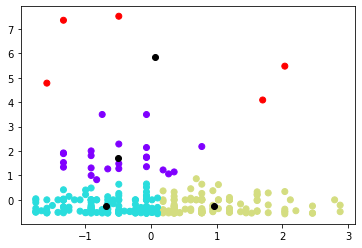

In [14]:
n = 4
km = KMeans(n_clusters=n, random_state=1)
labels = km.fit_predict(df_sc)
centers = km.cluster_centers_

plt.scatter(df_sc[:,1], df_sc[:,0], c=labels, cmap='rainbow')   # type: ignore
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0], color='black')

На графике *по горизонтали* отображается нормализованный *возраст* пациентов, а *по вертикали* - *уровень креатининфосфокиназы* в крови.

Затем, выведем координаты точек центроидов для каждого кластера, чтобы оценить их расположение относительно всего кластера.

Теперь возникает противоречие. По заданию необходимо "*рассчитать евклидово расстояние между кластерами*", но как это сделать, если кластер - это просто набор точек. Если судить по переменной `labels`, то она просто сохраняет индексы предложенных алгоритмом групп, поэтому искать евклидово расстояние между номерами групп бессмысленно.

Единственное **евклидово расстояние** которое можно рассчитать между кластерами, является расстояние между их центрами. Допустим, что по заданию требуется именно это, тогда для нахождения расстояния в библиотеке **NumPy** есть метод `linalg`, который возвращает суммарное расстояние между всеми точками

In [15]:
print(centers)
print('Euclidian distants between clusters = ', np.linalg.norm(centers))

[[ 1.71736732 -0.49821843]
 [-0.25839344 -0.68218056]
 [-0.24734873  0.95119868]
 [ 5.83996177  0.0648895 ]]
Euclidian distants between clusters =  6.2293686719206836


Теперь, **добавим** к временному датафрейму **новый столбец**, в который запишем номер кластера, к которому относится данная строка. Таким образом, полученный датафрейм показан ниже.

In [16]:
df_for_cluster['cluster_number'] = labels
df_for_cluster.head(10)

,creatinine_phosphokinase,age,cluster_number
0,582,75,2
1,7861,55,3
2,146,65,2
3,111,50,1
4,160,65,2
5,47,90,2
6,246,75,2
7,315,60,1
8,157,65,2
9,123,80,2


Наконец, рассчитаем оптимальное число кластеров для текущего временного датафрейма. Для этого, воспользуемся теоретическим "*методом локтя*", который заключается в том, что резкий скачек в значениях среднегеометрических позволяет определить необходимое число кластеров. Другими словами, для решения этого вопроса часто пользуются такой эвристикой: выбирают то число кластеров, начиная с которого среднее геометрическое падает "*уже не так быстро*". Ниже приведён график падения данного значения.

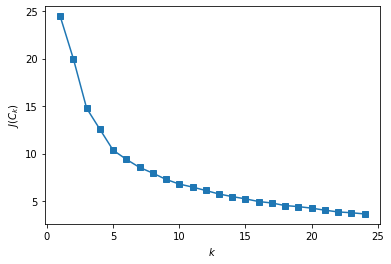

In [17]:
inertia = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_sc)
    inertia.append(np.sqrt(kmeans.inertia_))  # type: ignore

plt.plot(range(1, 25), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Исходя из данного графика видно, что оптимальным значением количества кластеров для данной задачи является число **5**. Поэтому, перестроим точечную диаграмму с размеченными на ней кластерами, а также изменим датафрейм со значениями для анализа.

,creatinine_phosphokinase,age,cluster_number
0,582,75,0
1,7861,55,2
2,146,65,1
3,111,50,3
4,160,65,1
5,47,90,0
6,246,75,0
7,315,60,1
8,157,65,1
9,123,80,0


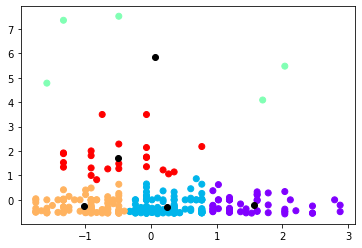

In [18]:
n = 5
km = KMeans(n_clusters=n, random_state=1)
labels = km.fit_predict(df_sc)
centers = km.cluster_centers_

plt.scatter(df_sc[:,1], df_sc[:,0], c=labels, cmap='rainbow')   # type: ignore
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0], color='black')

df_for_cluster['cluster_number'] = labels
df_for_cluster.head(10)

Таким образом, получившиеся кластеры можно охарактеризовать следующим образом:
- **Первый кластер** (фиолетовый) - люди пожилого возраста и с нормальным уровнем КФК в крови;
- **Второй кластер** (синий) - люди среднего возраста с нормальным уровнем КФК;
- **Третий кластер** (салатовый) - люди, с высоким уровнем КФК в крови;
- **Четвертый кластер** (красный) - люди среднего возраста, с повышенным уровнем КФК в крови;
- **Пятый кластер** (желтый) - люди среднего возраста с нормальным уровнем креатининфосфокиназы в крови.

### Кластеры из данных "`age`" и "`platelets`".

Рассмотрим другой пример выбора данных для кластеризации. В качестве испытуемых будут столбцы "`age`" и "`platelets`". Данные из этих двух столбцов добавим во временный датасет, предварительно отчистив его от предыдущих данных. И при помощи функции "`.head()`" показана первая пятерка значений.

In [19]:
df_for_cluster = pd.DataFrame(None)
df_for_cluster = pd.DataFrame(data['platelets'])
df_for_cluster['age'] = data['age']
df_for_cluster.head(5)

,platelets,age
0,265000.00,75
1,263358.03,55
2,162000.00,65
3,210000.00,50
4,327000.00,65


Затем, как и в предыдущем случая проведён *стандартизацию* данных для того, чтобы данные между собой можно было сравнивать.

In [20]:
sc = StandardScaler()
df_sc = sc.fit_transform(df_for_cluster)
print(df_sc[:5])

[[ 1.68164843e-02  1.19330213e+00]
 [ 7.53566018e-09 -4.90895827e-01]
 [-1.03807313e+00  3.51203153e-01]
 [-5.46474088e-01 -9.11945318e-01]
 [ 6.51798584e-01  3.51203153e-01]]


Далее, после завершения всех приготовлений, необходимо провести кластеризацию данных.*Количество* кластеров для начала возьмем равное **4**, поскольку в ходе выполнения предыдущего этапа данное число являлось оптимальным.

Также, создадим 2 массива данных: *первый* будет хранить значения классов, а *второй* - координаты центроидов получившихся классов.

И наконец, для более наглядного представления разбиения набора данных на кластеры, изобразим на точечном графике набор данных, разбитый на кластеры, выделенные отдельными цветами. Также, на этом же рисунке отобразим точки центроидов для каждого из кластеров. Таким образом, получится график, показанный ниже. На графике *по горизонтали* отображается стандартизованный *возраст* пациентов, а *по вертикали* - стандартизованное количество *тромбоцитов* в крови.

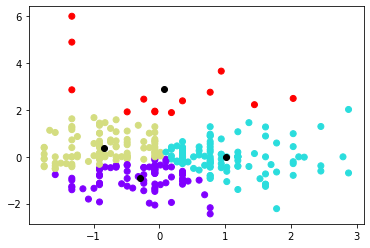

In [21]:
n = 4
km = KMeans(n_clusters=n, random_state=0)
labels = km.fit_predict(df_sc)
centers = km.cluster_centers_

plt.scatter(df_sc[:,1], df_sc[:,0], c=labels, cmap='rainbow')   # type: ignore
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0], color='black')

Затем, **выведем координаты точек центроидов** для каждого кластера, чтобы оценить их расположение относительно всего кластера, а также рассчитаем **евклидово расстояние** между центрами кластеров.


In [22]:
print(centers)
print('Euclidian distants between clusters = ', np.linalg.norm(centers))

[[-0.90452984 -0.29582733]
 [-0.02885581  1.01455471]
 [ 0.36682267 -0.84190936]
 [ 2.88211412  0.06618504]]
Euclidian distants between clusters =  3.3301913586880847


Наконец, рассчитаем оптимальное число кластеров для этого временного датафрейма. Для этого, воспользуемся теоретическим "*методом локтя*", который заключается в том, что резкий скачек в значениях средне геометрических позволяет определить необходимое число кластеров. Другими словами, для решения этого вопроса часто пользуются такой эвристикой: выбирают то число кластеров, начиная с которого среднее геометрическое падает "*уже не так быстро*". Ниже приведён графки падения данного значения.

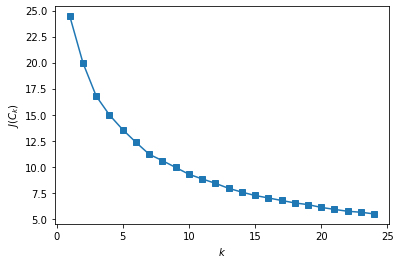

In [23]:
inertia = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_sc)
    inertia.append(np.sqrt(kmeans.inertia_))  # type: ignore

plt.plot(range(1, 25), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Исходя из данного графика видно, что оптимальным значением количества кластеров для данной задачи является число **9**. Поэтому, перестроим точечную диаграмму с размеченными на ней кластерами, а также изменим датафрейм со значениями для анализа.

,platelets,age,cluster_number
0,265000.00,75,2
1,263358.03,55,6
2,162000.00,65,7
3,210000.00,50,6
4,327000.00,65,8
5,204000.00,90,4
6,127000.00,75,4
7,454000.00,60,3
8,263358.03,65,8
9,388000.00,80,1


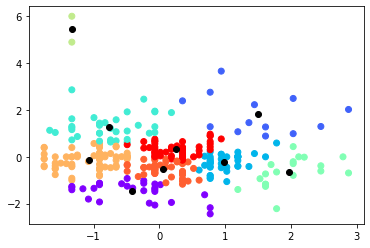

In [24]:
n = 9
km = KMeans(n_clusters=n, random_state=1)
labels = km.fit_predict(df_sc)
centers = km.cluster_centers_

plt.scatter(df_sc[:,1], df_sc[:,0], c=labels, cmap='rainbow')   # type: ignore
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0], color='black')

df_for_cluster['cluster_number'] = labels
df_for_cluster.head(10)

Таким образом, получившиеся кластеры можно охарактеризовать следующим образом:
- **Первый кластер** (фиолетовый) - люди пожилого возраста и с нормальным количеством тромбоцитов в крови;
- **Второй кластер** (морской) - люди пожилого возраста с высоким уровнем тромбоцитов;
- **Третий кластер** (салатовый) - люди зрелого возраста с нормальным количеством тромбоцитов в крови;
- **Четвертый кластер** (синий) - люди среднего возраста с нормальным уровнем тромбоцитов;
- **Пятый кластер** (бирюзовый) - люди среднего возраста с повышенным количеством тромбоцитов в крови;
- **Шестой кластер** (оранжевый) - средневозрастные люди с нормальным уровнем тромбоцитов;
- **Седьмой кластер** (бежевый) - люди среднего возраста с большим количеством тромбоцитов в крови;
- **Восьмой кластер** (красный) - люди среднего возраста с аномально высоким уровнем тромбоцитов;
- **Девятый кластер** (голубой) -люди среднего возраста с нормальным уровнем тромбоцитов;

### Кластеры из данных "`serum_creatinine`" и "`serum_sodium`".

Заключительный пример кластеризации будет производиться для столбцов "`serum_creatinine`" и "`serum_sodium`". Как и во всех предыдущих случаях, данные из этих двух столбцов добавим во временный датасет, предварительно отчистив его от предыдущих данных. И при помощи функции "`.head()`" показана первая пятерка значений.

In [25]:
df_for_cluster = pd.DataFrame(None)
df_for_cluster = pd.DataFrame(data['serum_creatinine'])
df_for_cluster['serum_sodium'] = data['serum_sodium']
df_for_cluster.head(5)

,serum_creatinine,serum_sodium
0,1.9,130
1,1.1,136
2,1.3,129
3,1.9,137
4,2.7,116


Затем, проведём *стандартизацию* данных для того, чтобы данные между собой можно было сравнивать, поскольку выбранные два столбца имеют разные диапазоны выборки.

In [26]:
sc = StandardScaler()
df_sc = sc.fit_transform(df_for_cluster)
print(df_sc[:5])

[[ 0.49005699 -1.50403612]
 [-0.28455235 -0.14197615]
 [-0.09090002 -1.73104612]
 [ 0.49005699  0.08503384]
 [ 1.26466633 -4.68217606]]


Далее, после завершения всех приготовлений, необходимо провести кластеризацию данных.*Количество* кластеров для начала возьмем равное **4**, поскольку в ходе выполнения предыдущего этапа данное число являлось оптимальным.

Также, создадим 2 массива данных: *первый* будет хранить значения классов, а *второй* - координаты центроидов получившихся классов.

Для наглядности представления разбиения набора данных на кластеры, изобразим на точечном графике набор данных, разбитый на кластеры, выделенные отдельными цветами. Также, на этом же рисунке отобразим точки центроидов для каждого из кластеров. Таким образом, получится график, показанный ниже. На графике *по горизонтали* отображается стандартизованный *натрий сыворотки* в крови пациентов, а *по вертикали* - стандартизованное количество *креатинин сыворотки*.

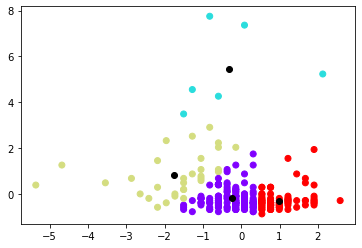

In [27]:
n = 4
km = KMeans(n_clusters=n, random_state=5)
labels = km.fit_predict(df_sc)
centers = km.cluster_centers_

plt.scatter(df_sc[:,1], df_sc[:,0], c=labels, cmap='rainbow')   # type: ignore
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0], color='black')

Затем, **выведем координаты точек центроидов** для каждого кластера, чтобы оценить их расположение относительно всего кластера, а также рассчитаем **евклидово расстояние** между центрами кластеров.


In [28]:
print(centers)
print('Euclidian distants between clusters = ', np.linalg.norm(centers))

[[-0.19221325 -0.2457917 ]
 [ 5.44432922 -0.33115115]
 [ 0.85237426 -1.74569192]
 [-0.28129188  0.98380811]]
Euclidian distants between clusters =  5.888015535865286


Рассчитаем оптимальное число кластеров для этого временного датафрейма. Для этого, как и во всех предыдущих случаях, воспользуемся теоретическим "*методом локтя*", который заключается в том, что резкий скачек в значениях средне геометрических позволяет определить необходимое число кластеров.

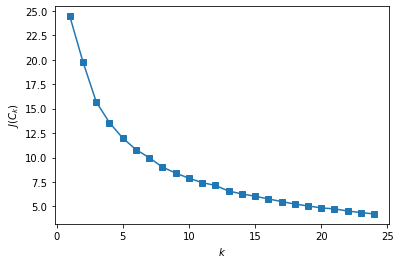

In [29]:
inertia = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=5).fit(df_sc)
    inertia.append(np.sqrt(kmeans.inertia_))  # type: ignore

plt.plot(range(1, 25), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Данный график является практически идеальными графиком для метода локтя, т.к. он практически не имеет острых связей, т.е. график гладкий. Исходя из данного графика видно, что оптимальным значением количества кластеров для данной задачи является число **8**. Поэтому, перестроим точечную диаграмму с размеченными на ней кластерами, а также изменим датафрейм со значениями для анализа.

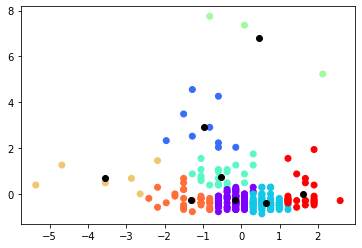

In [30]:
n = 8
km = KMeans(n_clusters=n, random_state=5)
labels = km.fit_predict(df_sc)
centers = km.cluster_centers_

plt.scatter(df_sc[:,1], df_sc[:,0], c=labels, cmap='rainbow')   # type: ignore
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0], color='black')

Таким образом, получившиеся кластеры можно охарактеризовать следующим образом:
- **Первый кластер** (красный) - пациенты, у которых уровень натрия сыворотки выше среднего, а уровень креатинина сыворотки находится в пределах нормы;
- **Второй кластер** (голубой) - люди, с уровнем натрия сыворотки и креатинина сыворотки в пределах нормы;
- **Третий кластер** (салатовый) - аномально высокий уровень креатинина сыворотки в крови;
- **Четвертый кластер** (фиолетовый) - группа, с идеальными показателями по обеим данным;
- **Пятый кластер** (бирюзовый) - слегка пониженный уровень натрия сыворотки и слегка повышен уровень креатинина сыворотки;
- **Шестой кластер** (синий) - уровень креатинина сыворотки повышен, а натрия сыворотки - понижен;
- **Седьмой кластер** (оранжевый) - пациенты, с пониженным уровнем натрия сыворотки и с нормальным уровнем креатинина сыворотки в крови;
- **Восьмой кластер** (желтый) - натрий сыворотки аномально низкий, креатинин сыворотки слегка повышен;

### Вывод

Таким образом, исходя из данных, полученных на этом шаге выполнения работы, можно сделать вывод о том, что оптимальное количество кластеров, полученное после выполнения иерархического агломеративного метода для отдельных столбцов не является оптимальным. Так, например, для кластеризации данных из столбцов "`age`" и "`creatinine_phosphokinase`" оптимальным количеством кластеров по *методу локтя* равняется **5**, для столбцов "`age`" и "`platelets`" = **9**, и для столбцов "`serum_creatinine`" и "`serum_sodium`" равняется **8**.

# Описание полученных кластеров <a id='33'></a>

В данной части работы необходимо описать полученные кластеры в терминах предметной области. Также, требуется дать каждому кластеру условное наименования с учётом значимости признаков, повлиявших на выделение кластеров.

Для начала, рассмотрим кластеры, полученные **иерархическим агломеративным методом**.

В ходе выполнения задачи кластеризации исходных данных при помощи этого метода, в итоге на дендрограмме удалось выделить **4 основных кластера**, поскольку на самой диаграмме были использовано 4 разных цвета. Полученные кластеры можно охарактеризовать следующим образом:
1. **Оранжевый кластер** - пациенты, которые выжили в процессе наблюдений;
2. **Зелёный кластер** - пациенты, скончавшиеся в процессе наблюдения и у которых показатели были в пределах нормы;
3. **Красный кластер** - умершие пациенты с аномальными данными по показателям;
4. **Фиолетовый кластер** - скончавшиеся пациенты с низкими данными показателей.

Получается, что наиболее значимым признаком при выделении кластеров является столбец "`death_event`", который показывает, умер ли пациент в течении периода наблюдений.

Далее, рассмотрим кластеры, полученные **методом к-средних**.

Поскольку при помощи данного метода была произведена проверка правильности выбора оптимального количества кластеров, а именно четырёх, которые были получены на предыдущем шаге выполнения работы, то кластеризация данным методом была проведена сразу для нескольких столбцов. Поэтому, рассмотрим кластеры из всех рассмотренных данных.

В начале, при помощи *метода к-средних* была проведена кластеризация для данных "`age`" и "`creatinine_phosphokinase`". После всех проделанных манипуляций, необходимых при работе с данным методом кластеризации, было получено, что оптимальным количеством кластеров для выбранных столбцов является **5 кластеров**. Полученные кластеры можно описать по следующему:
- **Первый кластер** (фиолетовый) - люди пожилого возраста и с нормальным уровнем КФК в крови;
- **Второй кластер** (синий) - люди среднего возраста с нормальным уровнем КФК;
- **Третий кластер** (салатовый) - люди, с высоким уровнем КФК в крови;
- **Четвертый кластер** (красный) - люди среднего возраста, с повышенным уровнем КФК в крови;
- **Пятый кластер** (желтый) - люди среднего возраста с нормальным уровнем креатининфосфокиназы в крови.

Затем, кластеризация данных при помощи *метода к-средних* была проведена для столбцов "`age`" и "`platelets`". В результате кластеризации выяснилось, что оптимальным количеством кластеров является **9 кластеров**, охарактеризовать которые можно следующим образом:
- **Первый кластер** (фиолетовый) - люди пожилого возраста и с нормальным количеством тромбоцитов в крови;
- **Второй кластер** (морской) - люди пожилого возраста с высоким уровнем тромбоцитов;
- **Третий кластер** (салатовый) - люди зрелого возраста с нормальным количеством тромбоцитов в крови;
- **Четвертый кластер** (синий) - люди среднего возраста с нормальным уровнем тромбоцитов;
- **Пятый кластер** (бирюзовый) - люди среднего возраста с повышенным количеством тромбоцитов в крови;
- **Шестой кластер** (оранжевый) - средневозрастные люди с нормальным уровнем тромбоцитов;
- **Седьмой кластер** (бежевый) - люди среднего возраста с большим количеством тромбоцитов в крови;
- **Восьмой кластер** (красный) - люди среднего возраста с аномально высоким уровнем тромбоцитов;
- **Девятый кластер** (голубой) -люди среднего возраста с нормальным уровнем тромбоцитов;

И заключительным этапом кластеризации *методом к-средних* стало разбиение столбцов "`serum_creatinine`" и "`serum_sodium`". После завершения всех этапов кластеризации, было получено, что оптимальным количеством является **8 кластеров**. Полученные кластеры можно охарактеризовать следующим образом:
- **Первый кластер** (красный) - пациенты, у которых уровень натрия сыворотки выше среднего, а уровень креатинина сыворотки находится в пределах нормы;
- **Второй кластер** (голубой) - люди, с уровнем натрия сыворотки и креатинина сыворотки в пределах нормы;
- **Третий кластер** (салатовый) - аномально высокий уровень креатинина сыворотки в крови;
- **Четвертый кластер** (фиолетовый) - группа, с идеальными показателями по обеим данным;
- **Пятый кластер** (бирюзовый) - слегка пониженный уровень натрия сыворотки и слегка повышен уровень креатинина сыворотки;
- **Шестой кластер** (синий) - уровень креатинина сыворотки повышен, а натрия сыворотки - понижен;
- **Седьмой кластер** (оранжевый) - пациенты, с пониженным уровнем натрия сыворотки и с нормальным уровнем креатинина сыворотки в крови;
- **Восьмой кластер** (желтый) - натрий сыворотки аномально низкий, креатинин сыворотки слегка повышен;

# Выводы <a id='34'></a>

В ходе выполнения данной лабораторной работы я улучшил свои навыки работы с Jupiter-блокнотами. Вновь осуществил предварительную обработку данных, а также вспомнил этапы работы с библиотекой **Pandas**.

Кроме этого, в данной лабораторной работе я в первые познакомился с процессом кластеризации данных и даже выполнил её при помощи двух методов: **иерархическим агломеративным** и **к-средних**. При использовании **иерархической кластеризации** происходит вычисление матрицы расстояний между всеми объектами, в ячейках которой будет попарное расстояние между двумя объектами. На основе этой матрицы можно последовательно объединять близкие кластеры. Однако расстояния между объектами и сама агломеративная иерархическая кластеризация хорошо визуализируется на специальных графиках - **дендрограммах**.

При использовании **метода к-средних** группировка объектов происходит пошагово. Алгоритм основан на предположении, что число кластеров (групп) заранее известно. Это довольно сильное допущение, и часто выбор оптимального количества кластеров заслуживает решения отдельных задач. Но, поскольку алгоритм к-средних самый популярный и простой алгоритм кластеризации, то его очень легко представить в виде простого псевдокода:
1) Выбирается количество кластеров *k*, которое кажется оптимальным для исходного набора данных;
2) Алгоритм пошагово подбирает их центры и относит объекты к тому кластеру, чей центр ближе;
3) Центры корректируются до тех пор, пока это позволяет минимизировать среднее расстояние от объектов каждого кластера до его центра;
4) Когда расстояние от объектов до центра перестаёт снижаться или сокращается несущественно, алгоритм останавливается и фиксирует разбиение, считая его оптимальным.

Первый метод сложный, зато не требует заданного заранее числа кластеров и позволяет визуализировать соотношения между объектами. Второй метод быстрый и понятный, однако чувствительный к заданному числу кластеров. Сложность агломеративной кластеризации заключается не в устройстве самого алгоритма, а в вычислениях, которые машина совершает для построения дендрограммы. Расчёты попарных расстояний могут занять очень много времени. Потому, при решении задачи кластеризации полезно строить дендрограмму на случайной подвыборке, а после оценки оптимального числа кластеров запустить более быстрый алгоритм к-средних.

Далее, рассмотрим проделанную работу поэтапно.

В начале, на этапе **предварительной обработки данных** было получено, что в исходном наборе данных отсутствуют какие-либо искажения в данных, т.е. не было ни пропусков, ни явных дубликатов, ни неявных дубликатов. Единственный обнаруженный недостаток заключался в том, что название последнего столбца, который хранил в себе информацию о том, умер ли пациент в течении периода наблюдения или нет, было написано в верхнем регистре. Данная ошибка была исправлена и на этом этап обработки был завершён.

Затем, этап **кластеризации данных** был разделён на два подэтапа. В первом из них была проведена кластеризация исходного набора данных **иерархическим агломеративным методом**. После завершения разбиения данных этим методом, было получено, что оптимальное число кластеров для исходной таблицы является **4 кластера**.

Во втором подэтапе был произведён ряд кластеризаций элементов исходного набора **методом к-средних** с целью проверить оптимальность полученного ранее значения. Таким образом, после завершения кластеризации данных "`age`" и "`creatinine_phosphokinase`" было получено, что оптимальным количеством кластеров для выбранных столбцов является **5 кластеров**. Для столбцов "`age`" и "`platelets`" оптимальным числом является **9 кластеров**, а для столбцов "`serum_creatinine`" и "`serum_sodium`" - **8 кластеров**. Получается, что ни для одного из проделанных экспериментов оптимальное число кластеров не равняется *четырем*.

И затем, на этапе **описания полученных кластеров** было произведено описание всех кластеров в терминах предметной области. Также, было дано каждому кластеру условное наименования с учётом значимости признаков, повлиявших на выделение кластеров. И в качестве основного признака, например, для агломеративного метода является столбец "`death_event`", который показывает, умер ли пациент в течении периода наблюдений.